# Diabetes Prediction

This project has aims to predict diabetes on patient based on features on dataset.

# Library

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import classification_report, confusion_matrix

# Data Loading and Preparation

In [2]:
# Load Dataset
# Dataset Source: https://www.kaggle.com/datasets/asinow/diabetes-dataset/data
df = pd.read_csv('diabetes_dataset.csv')

In [3]:
# Preview Data
df.head()

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
0,69,5,28.39,130.1,77.0,5.4,130.4,44.0,50.0,90.5,107.9,0.84,0,0,0,1,0
1,32,1,26.49,116.5,72.0,4.5,87.4,54.2,129.9,113.3,81.4,1.39,0,0,0,0,0
2,89,13,25.34,101.0,82.0,4.9,112.5,56.8,177.6,84.7,107.2,0.79,0,0,0,1,0
3,78,13,29.91,146.0,104.0,5.7,50.7,39.1,117.0,108.9,110.0,0.99,0,0,0,1,1
4,38,8,24.56,103.2,74.0,4.7,102.5,29.1,145.9,84.1,92.8,0.91,0,1,0,0,0


In [4]:
# Check Missing Value
df.isnull().sum()

,0
Age,0
Pregnancies,0
BMI,0
Glucose,0
BloodPressure,0
HbA1c,0
LDL,0
HDL,0
Triglycerides,0
WaistCircumference,0


# Exploratory Data Analysis

In [5]:
print("Dataset Shape:", df.shape)

Dataset Shape: (9538, 17)


In [6]:
print("\nFeature Information:")
print(df.info())


Feature Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9538 entries, 0 to 9537
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 9538 non-null   int64  
 1   Pregnancies         9538 non-null   int64  
 2   BMI                 9538 non-null   float64
 3   Glucose             9538 non-null   float64
 4   BloodPressure       9538 non-null   float64
 5   HbA1c               9538 non-null   float64
 6   LDL                 9538 non-null   float64
 7   HDL                 9538 non-null   float64
 8   Triglycerides       9538 non-null   float64
 9   WaistCircumference  9538 non-null   float64
 10  HipCircumference    9538 non-null   float64
 11  WHR                 9538 non-null   float64
 12  FamilyHistory       9538 non-null   int64  
 13  DietType            9538 non-null   int64  
 14  Hypertension        9538 non-null   int64  
 15  MedicationUse       9538 non-null

In [7]:
print("\nDescriptive Statistics:")
df.describe()


Descriptive Statistics:


,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
count,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000,9538.000000
mean,53.577584,7.986161,27.052364,106.104183,84.475781,4.650661,100.133456,49.953418,151.147746,93.951678,103.060621,0.917400,0.302474,0.486161,0.001048,0.405012,0.344097
std,20.764651,4.933469,5.927955,21.918590,14.123480,0.476395,29.911910,15.242194,48.951627,15.594468,13.438827,0.140828,0.459354,0.661139,0.032364,0.490920,0.475098
min,18.000000,0.000000,15.000000,50.000000,60.000000,4.000000,-12.000000,-9.200000,50.000000,40.300000,54.800000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,4.000000,22.870000,91.000000,74.000000,4.300000,80.100000,39.700000,117.200000,83.400000,94.000000,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,53.000000,8.000000,27.050000,106.000000,84.000000,4.600000,99.900000,50.200000,150.550000,93.800000,103.200000,0.910000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,72.000000,12.000000,31.180000,121.000000,94.000000,5.000000,120.200000,60.200000,185.100000,104.600000,112.100000,1.010000,1.000000,1.000000,0.000000,1.000000,1.000000
max,89.000000,16.000000,49.660000,207.200000,138.000000,6.900000,202.200000,107.800000,345.800000,163.000000,156.600000,1.490000,1.000000,2.000000,1.000000,1.000000,1.000000


<Axes: xlabel='Outcome', ylabel='count'>

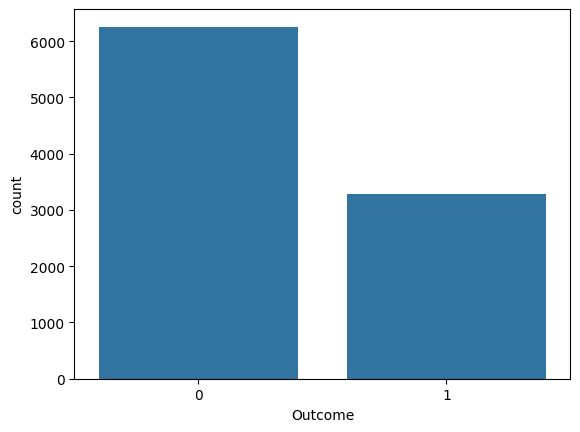

In [8]:
# Identifying Outcome
df['Outcome'].value_counts()

sns.countplot(x=df['Outcome'])

# Data Correlation

<Axes: >

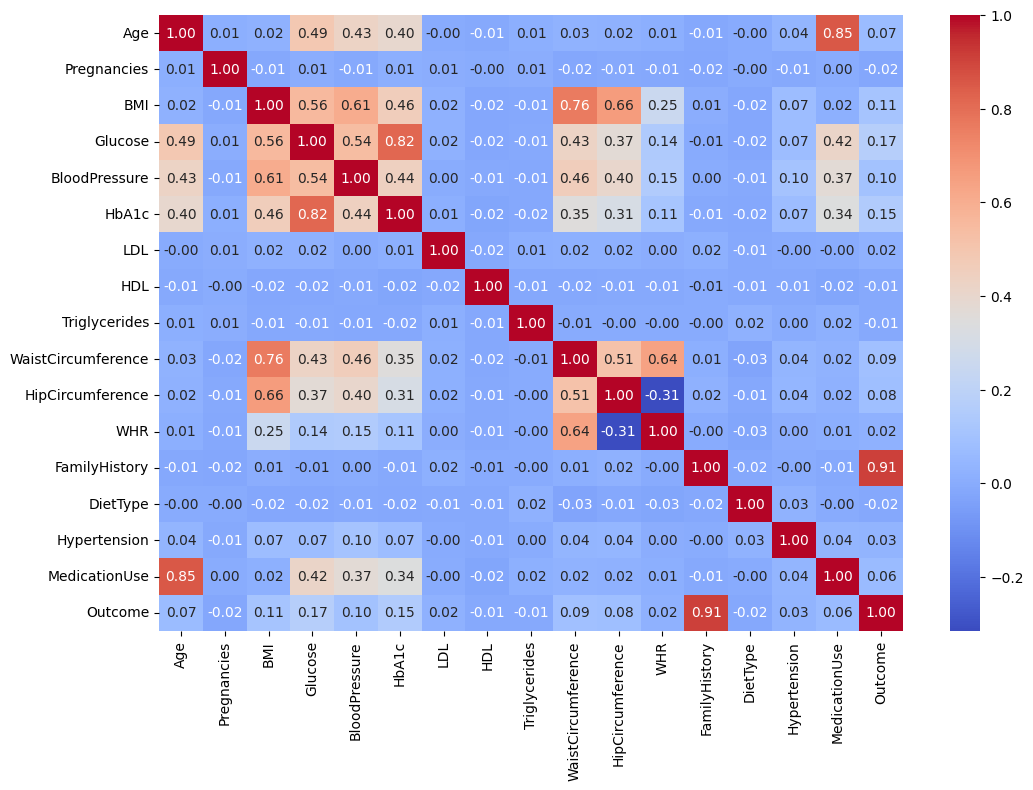

In [9]:
# Matrix Correlation
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linecolor = 'black')

Insight:
FamilyHistory 0.91 indicates leakage

#Feature Analysis

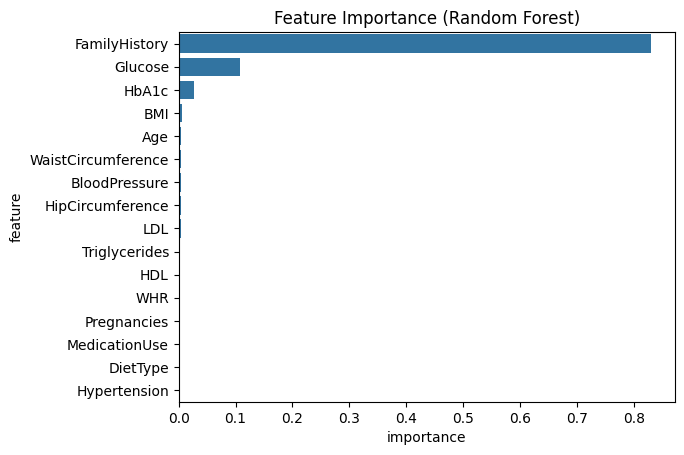

In [10]:
# Feature Importance using Random Forest
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# Buat dan latih model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Buat DataFrame feature importance
feature_importance = pd.DataFrame({"feature": X.columns, "importance": rf_model.feature_importances_})
feature_importance = feature_importance.sort_values("importance", ascending=False)

#plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x="importance", y="feature")
plt.title("Feature Importance (Random Forest)")
plt.show()

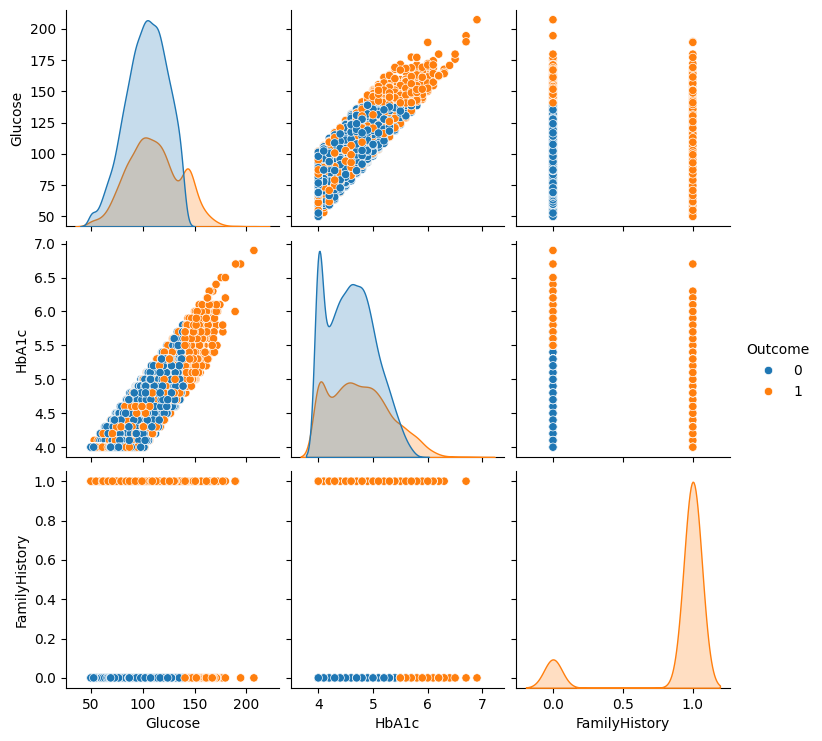

In [11]:
sns.pairplot(df, hue='Outcome', vars=['Glucose', 'HbA1c', 'FamilyHistory'])
plt.show()

From the pairplot it can conclude that:
- There is strong correlation between Glucose and HbA1c (The more high Glucose the more high Hb1Ac)
- FamilyHistory is dominant factor, its distribution is skewness 1

# Data Cleaning

In [12]:
# Check Outlier

numeric_cols = df[['Glucose', 'HbA1c']]

# Iterasi untuk setiap kolom numerik
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter outlier untuk kolom tersebut
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    print(f"Outlier di kolom '{col}':")
    #print(outliers, "\n")
    print(len(outliers))

Outlier di kolom 'Glucose':
34
Outlier di kolom 'HbA1c':
31


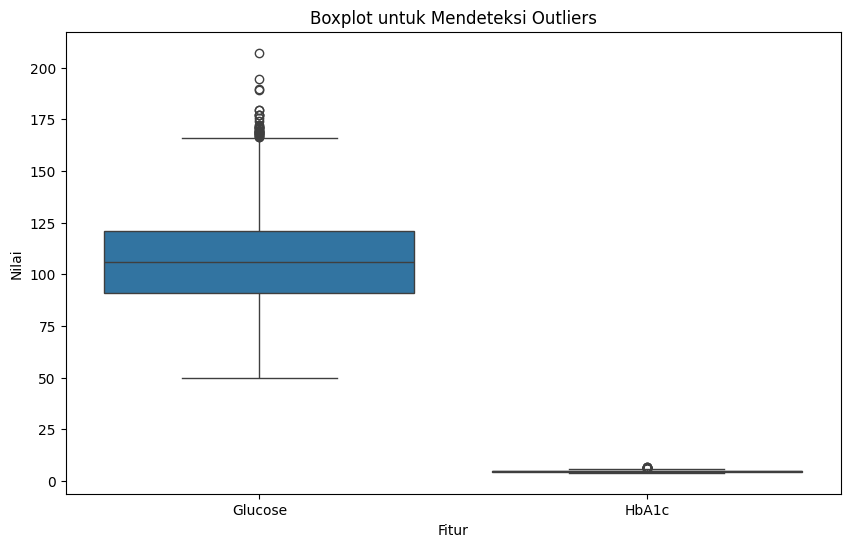

In [13]:
# Pilih 3 kolom yang ingin dianalisis
columns = ['Glucose', 'HbA1c']

# Membuat boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[columns])

# Menampilkan plot
plt.title("Boxplot untuk Mendeteksi Outliers")
plt.xlabel("Fitur")
plt.ylabel("Nilai")
plt.show()

From boxplot above, it can be seen that:
- From Glucose, data has outliers above and boxplot seems symmetrical with a little bit rigth-skewed because it has top tail which is little longer.
- From HbA1c, has very little data comparedd to Glucose. There are a few of outliers at the top

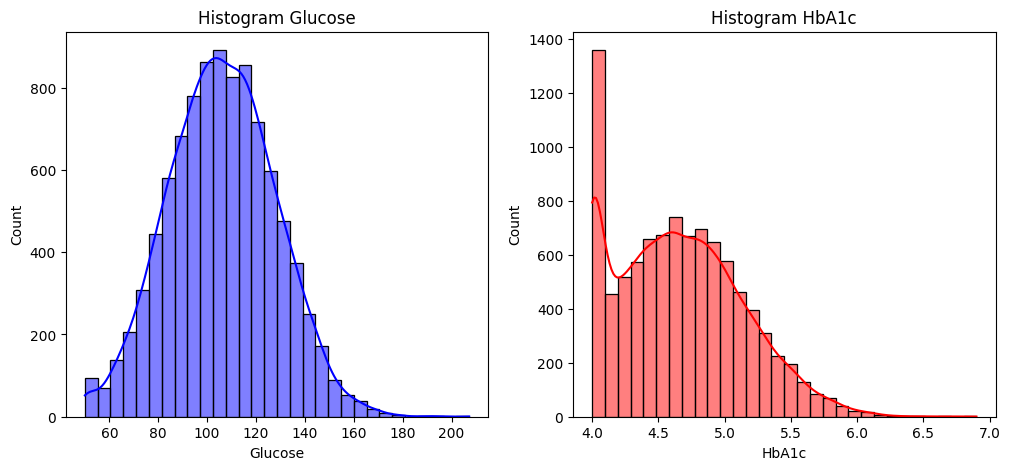

In [14]:
plt.figure(figsize=(12, 5))

# Histogram untuk Glucose
plt.subplot(1, 2, 1)
sns.histplot(df['Glucose'], bins=30, kde=True, color='blue')
plt.title('Histogram Glucose')

# Histogram untuk HbA1c
plt.subplot(1, 2, 2)
sns.histplot(df['HbA1c'], bins=30, kde=True, color='red')
plt.title('Histogram HbA1c')

plt.show()

- Glucose distribution is normal
- HbA1c distribution is right skewed

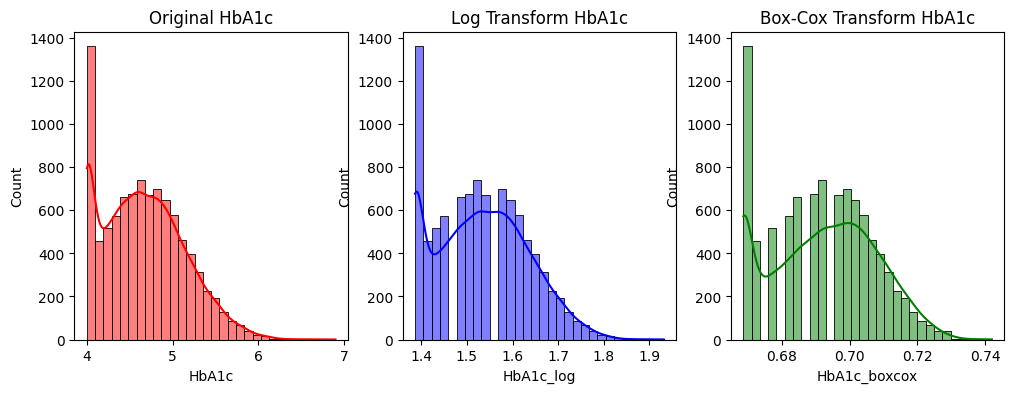

In [15]:
from scipy.stats import boxcox

# Transformasi log dan sqrt
df['HbA1c_log'] = np.log(df['HbA1c'])
df['HbA1c_sqrt'] = np.sqrt(df['HbA1c'])

# Transformasi Box-Cox (jika tidak ada nol)
df['HbA1c_boxcox'], _ = boxcox(df['HbA1c'] + 1e-5)  # Tambah nilai kecil agar tidak error

plt.figure(figsize=(12, 4))

# Histogram sebelum transformasi
plt.subplot(1, 3, 1)
sns.histplot(df['HbA1c'], bins=30, kde=True, color='red')
plt.title('Original HbA1c')

# Histogram setelah log transform
plt.subplot(1, 3, 2)
sns.histplot(df['HbA1c_log'], bins=30, kde=True, color='blue')
plt.title('Log Transform HbA1c')

# Histogram setelah Box-Cox transform
plt.subplot(1, 3, 3)
sns.histplot(df['HbA1c_boxcox'], bins=30, kde=True, color='green')
plt.title('Box-Cox Transform HbA1c')

plt.show()

# Modelling

In [16]:
X = df[['Glucose', 'HbA1c', 'FamilyHistory']]
y = df['Outcome']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [17]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (7630, 3)
X_test shape: (1908, 3)
y_train shape: (7630,)
y_test shape: (1908,)


In [18]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# Pemilihan Model
models = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Support Vector Machine': SVC()
}

for name, model in models.items():
    print('-' * 80)
    print(f'{name}:')

    kf = KFold(6, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=kf)

    print(f'Average cross validation score: {np.mean(scores)}')

--------------------------------------------------------------------------------
Logistic Regression:
Average cross validation score: 0.9899349959694071
--------------------------------------------------------------------------------
K-Nearest Neighbors:
Average cross validation score: 0.99905627393783
--------------------------------------------------------------------------------
Random Forest:
Average cross validation score: 1.0
--------------------------------------------------------------------------------
Support Vector Machine:
Average cross validation score: 0.7249950854472506


In [20]:
#Best Model

best_model = RandomForestClassifier(n_estimators=100)
best_model.fit(X_train_scaled, y_train)

y_pred = best_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1251
           1       1.00      1.00      1.00       657

    accuracy                           1.00      1908
   macro avg       1.00      1.00      1.00      1908
weighted avg       1.00      1.00      1.00      1908



Insight

Result from model evaluation using metrics evaluation:
- Accuracy model is perfect 100% to predict diabetes and non-diabetes
- There is no failure (False Positive and False Negative)
- Every diabetes is detected and there is no non-diabetes classified as diabetes

However, this result should be tested because model that has perfect accuracy might be caused by overfitting (model just works prefectly for this data not for new one)

Therefore, there is another test, comparison for accuracy training vs testing

In [21]:
# Akurasi Training vs Testing
from sklearn.metrics import accuracy_score

# Prediksi pada data training & testing
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

# Hitung akurasi training & testing
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Akurasi Training: {train_accuracy:.2f}")
print(f"Akurasi Testing: {test_accuracy:.2f}")

Akurasi Training: 1.00
Akurasi Testing: 1.00


Insight

Result Training Accuracy vs Testing Accuracy:
- Accuracy for data training and data testing is 100%. And cross-validation also has perfect score 100%.
- There is probability for this perfect score is data leakage that's caused by FamilyHistory feature which has 100% correlation with Diabetes (target).
- FamilyHistory feature is still used because it's relevant medically

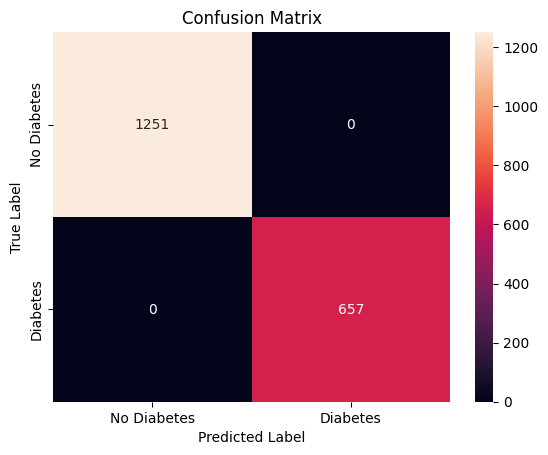

In [22]:
matrix = confusion_matrix(y_test, y_pred)

labels = ['No Diabetes', 'Diabetes']
sns.heatmap(matrix, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [27]:
# Simpan model ke file
joblib.dump(model, "diabetes_random_forest_model.pkl")

['diabetes_random_forest_model.pkl']

# Test - New Prediction

In [23]:
# Data baru dalam bentuk array
new_data = np.array([[146, 5.1, 0]])

# Lakukan scaling pada data baru dengan scaler yang sudah dilatih
new_data_scaled = scaler.transform(new_data)

# Prediksi hasilnya
prediction = best_model.predict(new_data_scaled)

print(f"Hasil prediksi: {prediction[0]}")

Hasil prediksi: 1


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


New Prediction with negative FamilyHistory
- Model is not overfitting, which is model still can predict right without positive FamilyHistory feature.
- It means, model is learning from other features.
- Although FamilyHistory is dominant, but Glucose and HbA1c are considered.

# Feature Test

In [24]:
X2 = df[['FamilyHistory']]
y = df['Outcome']

X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42, stratify=y)

#scaler = StandardScaler()
#X2_train_scaled = scaler.fit_transform(X2_train)
#X2_test_scaled = scaler.transform(X2_test)

best_model = RandomForestClassifier(n_estimators=100)
best_model.fit(X2_train, y_train)

y_pred = best_model.predict(X2_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.97      1251
           1       1.00      0.86      0.93       657

    accuracy                           0.95      1908
   macro avg       0.97      0.93      0.95      1908
weighted avg       0.96      0.95      0.95      1908



In [25]:
X3 = df[['Glucose', 'HbA1c']]
y = df['Outcome']

X3_train, X3_test, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=42, stratify=y)

#scaler = StandardScaler()
#X2_train_scaled = scaler.fit_transform(X2_train)
#X2_test_scaled = scaler.transform(X2_test)

best_model = RandomForestClassifier(n_estimators=100)
best_model.fit(X3_train, y_train)

y_pred = best_model.predict(X3_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.71      1251
           1       0.44      0.40      0.42       657

    accuracy                           0.62      1908
   macro avg       0.57      0.56      0.57      1908
weighted avg       0.61      0.62      0.61      1908



Model without FamilyHistory feature, accuracy is decreased significantly, it also happens in model that just has FamilyHistory feature. It can be concluded that these three features are important.